<a href="https://colab.research.google.com/github/JesusRodrigoV/AXL-CasoEstudio01-Case4-ML/blob/main/notebooks/Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

SEED = 42
np.random.seed(SEED)

pd.set_option("display.max_columns", 10)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [2]:
import zipfile
import urllib.request
from pathlib import Path

#Constantes y rutas
URL= "https://www.kaggle.com/api/v1/datasets/download/hmavrodiev/london-bike-sharing-dataset"
ZIP = "archive.zip"
CSV = "london_merged.csv"

def cargar_datos(ruta: str | Path = "dataset") -> pd.DataFrame:
  # Descargar, extraer y validar el dataset de bicicletas de Londres
  ruta = Path(ruta)
  ruta_zip = ruta / ZIP
  ruta_csv = ruta / CSV

  # Crear la ruta si no existe
  if not ruta.exists():
    ruta.mkdir(parents=True, exist_ok=True)

  # Descargar si no existe
  if not ruta_zip.is_file():
    print(f"Descargando dataset")

    try:
      opener = urllib.request.build_opener()
      urllib.request.install_opener(opener)

      urllib.request.urlretrieve(URL, ruta_zip)
      print("Descarga completada")
    except Exception as e:
      print(f"Error al descargar el dataset: {e}")
      return None
  else:
    print("Archivo detectado. Omitiendo descarga")

  if not ruta_csv.is_file():
    print(f"Extrayendo ZIP")

    try:
      with zipfile.ZipFile(ruta_zip, "r") as zip_ref:
        if CSV in zip_ref.namelist():
          zip_ref.extract(CSV, ruta)
          print(f"Archivo {CSV} extraido")
        else:
          print(f"Archivo {CSV} no encontrado")
          return None
    except zipfile.BadZipFile:
      print(f"Error al extraer el ZIP")
      return None

  # Cargar el dataset y verificar la estructura
  df = pd.read_csv(ruta_csv)
  #Validaciones
  assert isinstance(df, pd.DataFrame)
  assert not df.empty
  print(f"Datos cargados exitosamente:", df.shape)
  return df



df_bikes = cargar_datos()
df_bikes.head()


Descargando dataset
Descarga completada
Extrayendo ZIP
Archivo london_merged.csv extraido
Datos cargados exitosamente:00, (17414, 10)


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


## EDA

In [3]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
df_bikes.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [5]:
df_bikes["season"].value_counts()

,count
season,
0.0,4394
1.0,4387
3.0,4330
2.0,4303


In [6]:
df_bikes["weather_code"].value_counts()

,count
weather_code,
1.0,6150
2.0,4034
3.0,3551
7.0,2141
4.0,1464
26.0,60
10.0,14


In [7]:
df_bikes["is_holiday"].value_counts()

,count
is_holiday,
0.0,17030
1.0,384


In [8]:
# Tratamiento de la variable timestamp
df_bikes['timestamp'] = pd.to_datetime(df_bikes['timestamp'])

df_bikes['hour'] = df_bikes['timestamp'].dt.hour
df_bikes['day_of_week'] = df_bikes['timestamp'].dt.dayofweek
df_bikes['month'] = df_bikes['timestamp'].dt.month

In [9]:
# Creacion de un Target para Clasificación (High_Demand)
umbral_p90 = df_bikes['cnt'].quantile(0.90)
df_bikes['High_Demand'] = (df_bikes['cnt'] > umbral_p90).astype(int)

(14.5, -0.5)

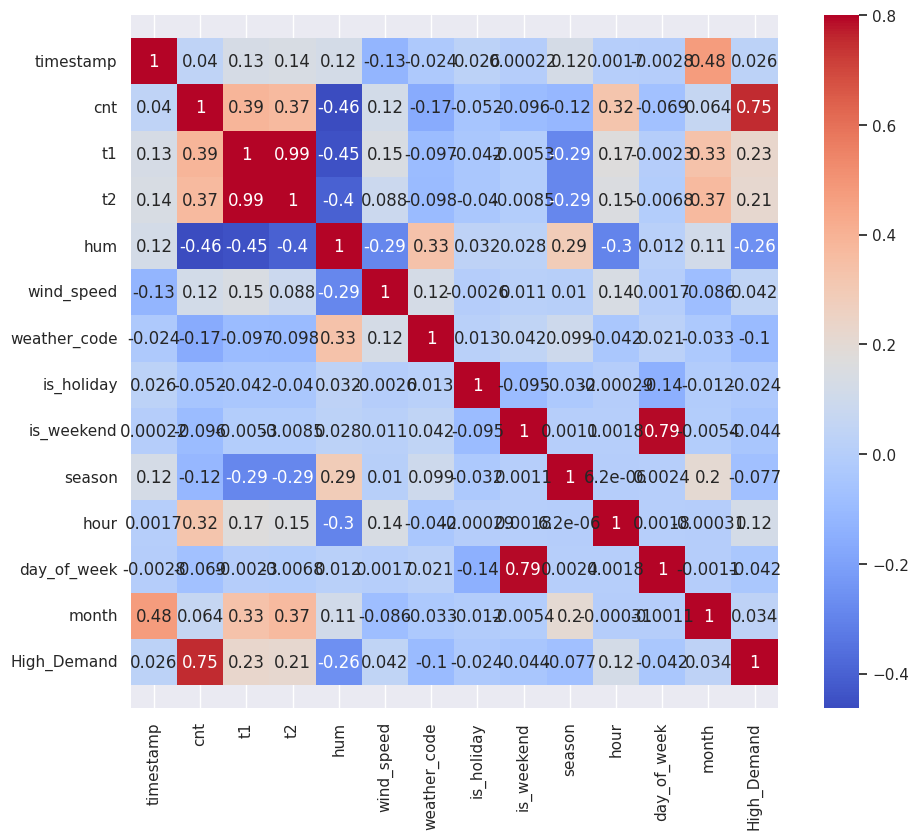

In [12]:
sns.set_style("darkgrid")
corrmat = df_bikes.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap="coolwarm");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

La matriz de correlacion nos permite ver la fuerte correlación negativa con la humedad (-0.46), lo que indica que el incremento de la humedad es factor que afecta el uso del transporte. La temperatura (t1 con 0.39) y la hora del día (hour con 0.32) muestran una relación positiva, confirmando que el clima y los ciclos horarios naturales influyen en el transporte.

Existe alta correlación entre la temperatura real (t1) y la sensación térmica (t2), con un coeficiente de 0.99, para esto se utilizará Regresión Lasso.

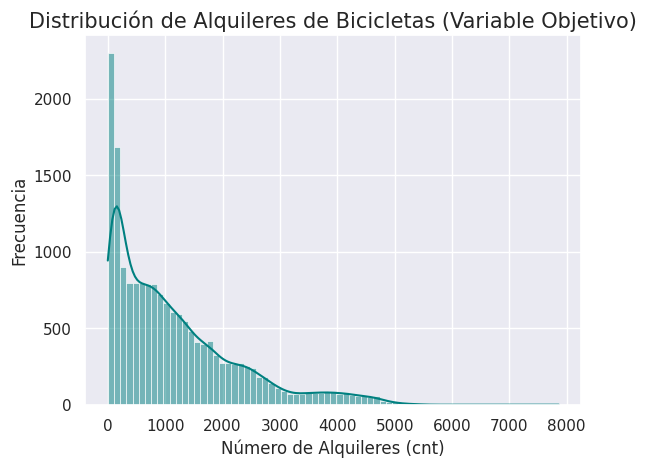

In [13]:
sns.histplot(df_bikes['cnt'], kde=True, color='teal')

plt.title('Distribución de Alquileres de Bicicletas (Variable Objetivo)', fontsize=15)
plt.xlabel('Número de Alquileres (cnt)')
plt.ylabel('Frecuencia')
plt.show()

El histograma de la variable target muestra una distribución con cola hacia la derecha. La mayor frecuencia de datos se concentra en rangos de demanda baja a moderada.

La mayoría del tiempo el sistema opera bajo una carga predecible. Esta observación nos permite definir el umbral de High_Demand en el percentil 85 a 90.

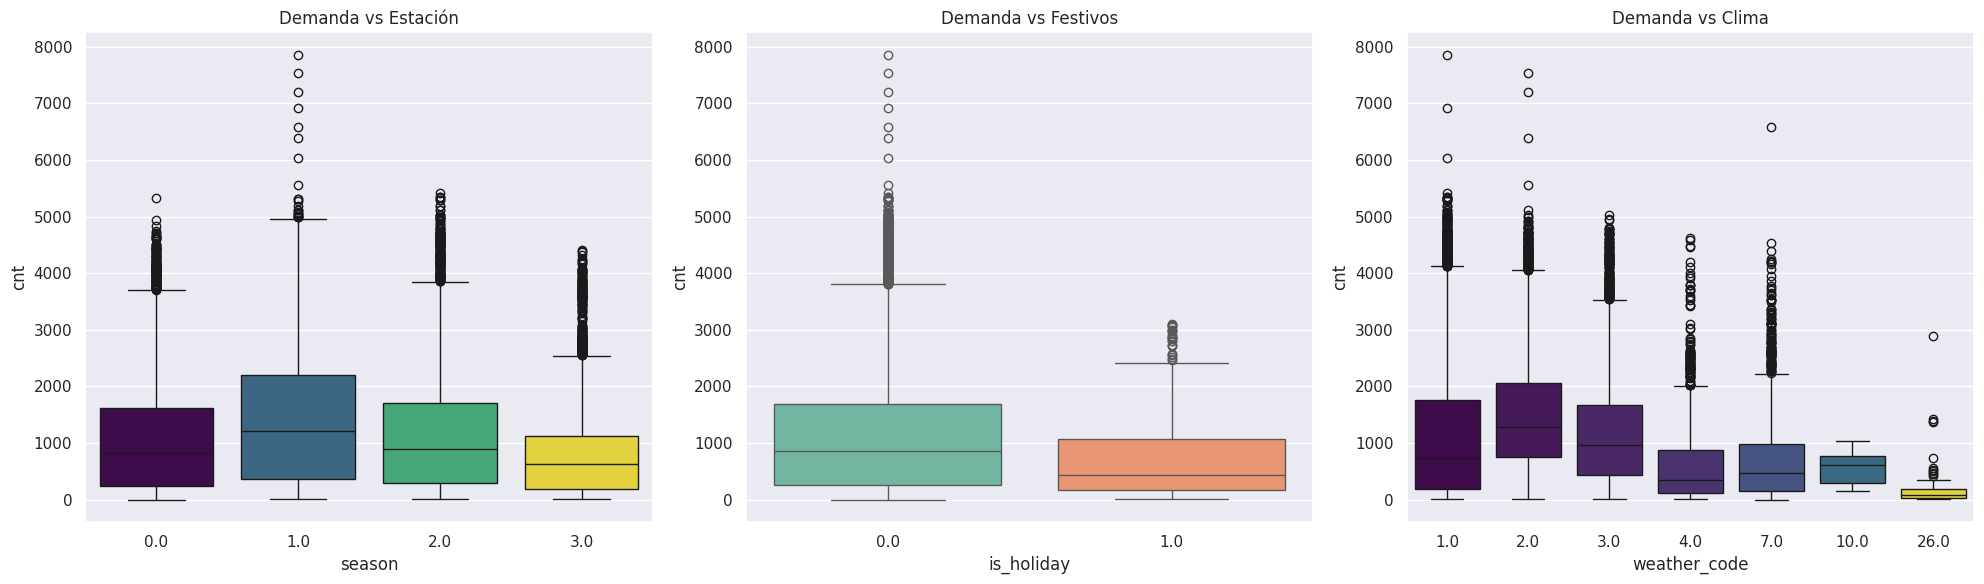

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Demanda por Estación
sns.boxplot(x='season', y='cnt', data=df_bikes, ax=axes[0], palette='viridis', hue='season', legend=False)
axes[0].set_title('Demanda vs Estación')

# Demanda en Día Festivo
sns.boxplot(x='is_holiday', y='cnt', data=df_bikes, ax=axes[1], palette='Set2', hue='is_holiday',legend=False)
axes[1].set_title('Demanda vs Festivos')

# Demanda según Clima
sns.boxplot(x='weather_code', y='cnt', data=df_bikes, ax=axes[2], palette='viridis', hue='weather_code',legend=False)
axes[2].set_title('Demanda vs Clima')

plt.tight_layout()
plt.show()

Los gráficos boxplot revelan comportamiento de la demanda a través de distintas categorías:
- Demanda vs Estación (season): Se observa una disparidad evidente en los niveles de consumo entre el verano (1.0) y el invierno (3.0). La diferencia nos indica que podemos hacer la estratificación del conjunto de datos por estación.
- Demanda vs Festivos (is_holiday): La demanda es superior en días laborables (0.0). Inferimos que el sistema de bicicletas en Londres funciona principalmente para la productividad urbana y no como una actividad recreativa de días feriados.
- Demanda vs Clima (weather_code): El gráfico confirma que climas despejados concentran gran parte de la operación. Pero ante la presencia de nieve (26.0), la demanda cae mucho.

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

# Definicion de variables
X = df_bikes.drop(columns=['cnt', 'High_Demand', 'timestamp'])
y_reg = df_bikes['cnt']
y_clf = df_bikes['High_Demand']

# Estratifica por 'season'
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df_bikes, df_bikes['season']):
    train_set = df_bikes.loc[train_index]
    test_set = df_bikes.loc[test_index]

# Separacion de variables
X_train = train_set.drop(columns=['cnt', 'High_Demand', 'timestamp'])
y_train_reg = train_set['cnt']
y_train_clf = train_set['High_Demand']

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Variables numericas
cols_num = ['t1', 't2', 'hum', 'wind_speed']

# Variables categoricas
cols_cat = ['weather_code', 'is_holiday', 'is_weekend', 'season', 'hour', 'day_of_week', 'month']

# Imputacion de nulos por mediana y escalado estandar
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Transformacion con One-Hot Encoding
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Construccion del Preprocesador Global
preprocesador = ColumnTransformer(
    transformers=[
        ('num', num_transformer, cols_num),
        ('cat', cat_transformer, cols_cat)
    ]
)

# Preprocesamiento al conjunto de entrenamiento
X_train_prep = preprocesador.fit_transform(X_train)

print(f"Dimensiones de la matriz procesada: {X_train_prep.shape}")

Dimensiones de la matriz procesada: (13931, 62)
